# Image Segmentation using K-Means

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Building our model

In [2]:
im =  cv2.imread('/home/yuvraj/Downloads/hid/x/Coding Blocks ML/22-Project - Image Segmentation using K-Means/elephant.jpg') # Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


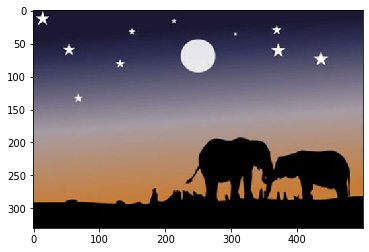

In [3]:
plt.imshow(im) # as RGB Format
plt.show()

In [4]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## K-Means Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
print(centers) # In RGB Format

[[174.83470046 145.27892624 128.24945289]
 [  1.49862458   0.83828001   1.15595772]
 [ 99.17991389  95.27668808 118.17629169]
 [ 38.25494879  35.55333546  64.76489943]]


In [8]:
# Convert to Integer format
centers = np.array(centers,dtype='uint8')

In [9]:
print(centers)

[[174 145 128]
 [  1   0   1]
 [ 99  95 118]
 [ 38  35  64]]


#### Q. Plot what all colors are these ?

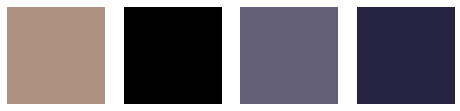

In [10]:
i = 1

plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

## Segmenting our original image

In [11]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


In [12]:
colors

[array([174, 145, 128], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [13]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

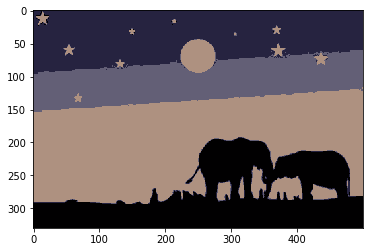

In [14]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()